In [1]:
import numpy as np
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import multihist as mh

import appletree as apt
from appletree import ContextER

In [2]:
apt.set_gpu_memory_usage(0.2)

# Define context

In [3]:
tree = ContextER()

In [4]:
tree.print_context_summary(short=True)


LIKELIHOOD rn220_llh

BINNING

    bins_type: equiprob
    bins_on: ['cs1', 'cs2']

DATA

    file_name: /home/xudc/appletree/appletree/data/data_XENONnT_Rn220_v8_strax_v1.2.2_straxen_v1.7.1_cutax_v1.9.0.csv
    data_rate: 2058.0

MODEL

    COMPONENT 0: rn220_ac
        type: fixed
        rate_par: rn220_ac_rate
        pars: ['rn220_ac_rate']

    COMPONENT 1: rn220_er
        type: simulation
        rate_par: rn220_er_rate
        pars: ['drift_velocity', 'fano', 'field', 'g1', 'g2', 'gas_gain', 'nex_ni_ratio', 'p_dpe', 'py0', 'py1', 'py2', 'py3', 'py4', 'rf0', 'rf1', 'rn220_er_rate', 's2_threshold', 'w']


LIKELIHOOD ar37_llh

BINNING

    bins_type: equiprob
    bins_on: ['cs1', 'cs2']

DATA

    file_name: /home/xudc/appletree/appletree/data/data_XENONnT_Ar37_v2_1e4_events_2sig_strax_v1.2.2_straxen_v1.7.1_cutax_v1.9.0.csv
    data_rate: 9940.0

MODEL

    COMPONENT 0: ar37_er
        type: simulation
        rate_par: ar37_er_rate
        pars: ['ar37_er_rate', 'drift_velocity

In [5]:
tree.par_manager.get_all_parameter()

{'w': 0.013648491876116059,
 'fano': 0.059,
 'gas_gain': 31.3,
 'drift_velocity': 0.0677,
 's2_threshold': 500.0,
 'field': 23.0,
 'nex_ni_ratio': 0.06013436542152991,
 'g1': 0.15305387646105997,
 'g2': 16.019065559371807,
 'p_dpe': 0.24210636776726396,
 'py0': 0.12196077864350502,
 'py1': 42.5278415648352,
 'py2': -0.3862084440682624,
 'py3': 1.2132341842351368,
 'py4': 0.6390654486011846,
 'rf0': 0.02900051768800307,
 'rf1': 0.23857624132332833,
 'ac_rate': 11.162843909421015,
 'er_rate': 1957.4746873183217,
 'rn220_ac_rate': 10.027609175753014,
 'rn220_er_rate': 1962.222281210032,
 'ar37_er_rate': 1987.4294875829582}

In [6]:
tree.log_posterior(tree.par_manager.parameter_fit_array)

10678.13860589472

# Fit

In [7]:
tree.fitting(nwalkers=200, steps=100)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:41<00:00,  3.41s/it]


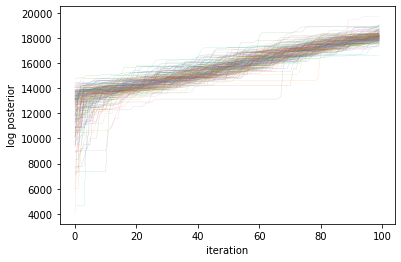

In [8]:
logp = tree.sampler.get_log_prob()

for _logp in logp.T:
    plt.plot(_logp, lw=0.1)

plt.xlabel('iteration')
plt.ylabel('log posterior')
plt.show()

# Generate templates

In [9]:
cs1, cs2, eff = tree.get_template('rn220_llh', 'rn220_er')

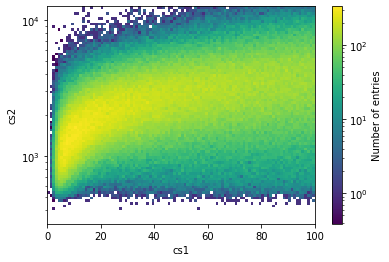

In [10]:
h, be = jnp.histogramdd(
    jnp.asarray([cs1, cs2]).T, 
    bins=(jnp.linspace(0, 100, 101), jnp.logspace(2.5, 4.1, 81)), 
    weights=eff
)

h = mh.Histdd.from_histogram(
    np.array(h), 
    be, 
    axis_names=['cs1', 'cs2']
)
h.plot(norm=LogNorm())
plt.yscale('log')
plt.show()

In [11]:
cs1, cs2, eff = tree.get_template('ar37_llh', 'ar37_er')

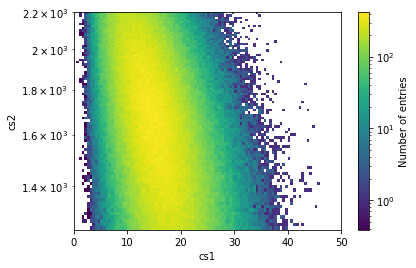

In [12]:
h, be = jnp.histogramdd(
    jnp.asarray([cs1, cs2]).T, 
    bins=(jnp.linspace(0, 50, 101), jnp.linspace(1250, 2200, 81)), 
    weights=eff
)

h = mh.Histdd.from_histogram(
    np.array(h), 
    be, 
    axis_names=['cs1', 'cs2']
)
h.plot(norm=LogNorm())
plt.yscale('log')
plt.show()